#### ※ contourf meshgrid. の使用例は下に記載

In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_regions(clf, X, y):
    """モデルが学習した領域をプロット"""
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.3),
                           np.arange(x2_min, x2_max, 0.3))
    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    plt.scatter(x=X[y == 0, 0], y=X[y == 0, 1], alpha=0.8, c='red')
    plt.scatter(x=X[y == 1, 0], y=X[y == 1, 1], alpha=0.8, c='blue')

In [39]:
import pandas as pd
df = pd.read_csv('jh_heights_weights.csv')
df.head()

,Unnamed: 0,height,weight,y
0,0,146,51,0
1,1,147,53,0
2,2,148,55,0
3,3,148,50,0
4,4,149,44,0


In [40]:
X = df[["height", "weight"]].values
y = df["y"].values

#### C: 値が小さいほど正則化（複雑なモデルになりづらくなる） default 1 <br> solver: 最適なパラメータの探索方法を設定 {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000, random_state=0, solver='liblinear')

In [42]:
lr.fit(X, y)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### 機械学習が学習した「境界」をプロット

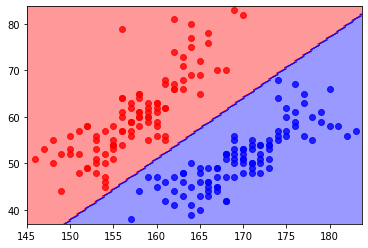

In [43]:
plot_regions(lr, X, y);

#### C = 10　の場合

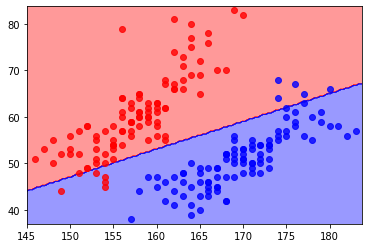

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=10, random_state=0, solver='liblinear')
lr.fit(X, y)

plot_regions(lr, X, y);

#### contourf, meshgrid

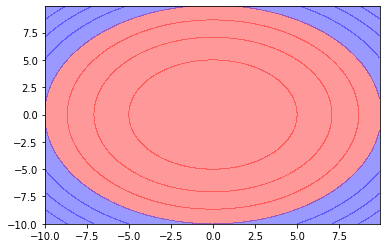

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x**2 + y**2

X, Y = np.meshgrid(np.arange(-10, 10, 0.1),
                   np.arange(-10, 10, 0.1))
Z = f(X, Y)

plt.contourf(X, Y, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))

In [46]:
X, Y, Z

(array([[-10. ,  -9.9,  -9.8, ...,   9.7,   9.8,   9.9],
        [-10. ,  -9.9,  -9.8, ...,   9.7,   9.8,   9.9],
        [-10. ,  -9.9,  -9.8, ...,   9.7,   9.8,   9.9],
        ...,
        [-10. ,  -9.9,  -9.8, ...,   9.7,   9.8,   9.9],
        [-10. ,  -9.9,  -9.8, ...,   9.7,   9.8,   9.9],
        [-10. ,  -9.9,  -9.8, ...,   9.7,   9.8,   9.9]]),
 array([[-10. , -10. , -10. , ..., -10. , -10. , -10. ],
        [ -9.9,  -9.9,  -9.9, ...,  -9.9,  -9.9,  -9.9],
        [ -9.8,  -9.8,  -9.8, ...,  -9.8,  -9.8,  -9.8],
        ...,
        [  9.7,   9.7,   9.7, ...,   9.7,   9.7,   9.7],
        [  9.8,   9.8,   9.8, ...,   9.8,   9.8,   9.8],
        [  9.9,   9.9,   9.9, ...,   9.9,   9.9,   9.9]]),
 array([[200.  , 198.01, 196.04, ..., 194.09, 196.04, 198.01],
        [198.01, 196.02, 194.05, ..., 192.1 , 194.05, 196.02],
        [196.04, 194.05, 192.08, ..., 190.13, 192.08, 194.05],
        ...,
        [194.09, 192.1 , 190.13, ..., 188.18, 190.13, 192.1 ],
        [196.04, 194.